<center>
    <img src="https://www.brandingmag.com/wp-content/uploads/2013/12/the-academy-oscars-new-logo-1.jpg" width='30%'> 
</center>

----------

<h1 align="center"> Webscraping Project - OSCARS</h1>
<br>
<center align="left"> <font size='4'>  Developed by: </font><font size='4' color='#33AAFBD'>Wenyi Hu</font></center>
<br>

----------

In [236]:
# imports

from bs4 import BeautifulSoup # For HTML parsing
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts

import random
import requests # Website connections
import pandas as pd # For converting results to a dataframe and bar chart plots
import numpy as np
import json # For parsing json
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go 

py.init_notebook_mode(connected=True)

## $\Delta$ Awards Categories in Different Years

In [2]:
# define a function to get the pages in different years
def get_page(year):
    page_url = f'https://www.oscars.org/oscars/ceremonies/{year}'
    result = requests.get(page_url)
    soup = BeautifulSoup(result.content)
    return soup

# scrape all award categories in different years from 1929 to 2022
header_dict={}
for year in range(1929,2023):
    
    headers=[]
    sleep(random.randint(1,5))    
    contents= get_page(year).find('div', id='quicktabs-tabpage-honorees-0').find('div',class_='view-content').findChildren(recursive=False)
    
    # get all possible award categories from webpage
    for x in contents:
        try:
            header = x.find('div',class_='view-grouping-header').getText()
            headers.append(header)
        except:
            headers.append('error!')
            
    
    # create a dictionary with {key:value} == {year:[category list]}
    header_dict[year]=headers

# save data as dataframe and save in a .csv file
category_df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in header_dict.items()]))
category_df.to_csv('award_category.csv')

## $\Delta$ Ceremony Information in Different Years


In [3]:
# define a function to get the pages in different years
def get_page(year):
    page_url = f'https://www.oscars.org/oscars/ceremonies/{year}'
    result = requests.get(page_url)
    soup = BeautifulSoup(result.content)
    return soup

# scrape all ceremony information in different years from 1929 to 2022
year_list = []
ordinal_number_list = []
location_list = []
date_list = []
release_list = []
for year in range(1929,2023):
    
    sleep(random.randint(1,5))  

    title = get_page(year).find('div', class_='views-field views-field-title').get_text()
    
    ordinal_number = title.split('|')[0].split()[1]
    ordinal_number_list.append(ordinal_number)
    
    year = title.split('|')[1].strip()
    year_list.append(year)
   
    location = get_page(year).find('div',class_='views-field views-field-field-location-name').get_text().strip()
    location_list.append(location)
    
    date = get_page(year).find('div',class_='views-field views-field-field-date').get_text().strip()
    date_list.append(date)

    release = get_page(year).find('div',class_='views-field views-field-field-honoring-line').get_text()
    release_list.append(release)

# convert list to pd.Series
Ordinal=pd.Series(ordinal_number_list)
Year = pd.Series(year_list)
Location = pd.Series(location_list)
Date = pd.Series(date_list)
Release = pd.Series(release_list)

# concate multiple series to form a dataframe and save as .csv
df = pd.concat({'Ordinal':Ordinal,'Year':Year,'Location':Location,'Date':Date,'Release':Release}, axis = 1).set_index('Ordinal')
df.to_csv('ceromony_information.csv')     

## $\Delta$ Academy Presidents with Year Range

In [4]:
academy_story_page = 'https://www.oscars.org/academy-story'
result = requests.get(academy_story_page)
soup = BeautifulSoup(result.content)

group_list = soup.find('div', class_ = 'l-region l-region--content').find('div',class_='view-content').findChildren(recursive=False)

name_list = []
start_list = []
end_list =[]
# for loop to obtain the academy 
for group in group_list:
    try:
        content = group.find('div',class_='field-info').get_text('from').replace('–','-').replace(',','from').split('from')
        # filter out useless information
        for x in content:
            if x.strip() ==  'Academy President':
                content.remove(x)
            elif x.strip() == 'died':
                content.remove(x)
        
        # separete time and name into different lists
        for y in content:
            if '-' in y:
                start_list.append(y.split('-')[0].strip())
                end_list.append(y.split('-')[1].strip())
            else:
                name_list.append(y.strip())

    except:
        start_list.append('error')
        end_list.append('error')
        name_list.append('error')
    
    # remove 'error' from the content list
    [start_list.remove(t) for t in start_list if t =='error']
    [end_list.remove(t) for t in end_list if t =='error']
    [name_list.remove(n) for n in name_list if n =='error']
    

# convert list to pd.Series
Start = pd.Series(start_list)
End = pd.Series(end_list)
Name = pd.Series(name_list)

df=pd.concat({'Name':Name,'Start Time':Start,'End Time':End},axis=1)
df.to_csv('academy_president.csv')

## $\Delta$ Awards Information in Different Years

In [19]:
def get_page(year):
    page_url = f'https://www.oscars.org/oscars/ceremonies/{year}'
    result = requests.get(page_url)
    soup = BeautifulSoup(result.content)
    return soup
categories = []
field1 = []
field2 = []
status = []
award = []
year = []
data = {}
for yr in range(1929,2023):
    groups = get_page(yr).find('div', class_='view-display-id-osc_honoree_by_cat').find('div', class_='view-content').findChildren(recursive=False)
    
    for group in groups:
            
        # get the nominees information from field 1 (f1) and field 2 (f2) in the website
        # return a list of information in field1 and field2
        f1 = group.find('div', class_='view-grouping-content').find_all('h4',class_='field-content')
        for x in f1:
            field1.append(x.text.strip())
            
        f2 = group.find('div', class_='view-grouping-content').find_all('div', class_='views-field views-field-title')
        for x in f2:
            field2.append(x.text.strip())
        
        category = group.find('div', class_='view-grouping-header').getText().strip()
        # get all award categories without duplicates
        if category not in categories:
            categories.append(category)
            categories.sort()
        # append the award into the award list
        for i in range(0,len(f1)): # len(f1) is the total number of winners and nominees
            award.append(category)
        
        # find the number of winners and nominees in an award
        content = group.find('div', class_='view-grouping-content').findChildren(recursive=False)
        lst = []
        for con in content:
            lst.append(con.text)
            if 'Nominees' in lst:
                for i in range(0,len(lst)):
                    if lst[i] == 'Nominees':
                        num_of_winners = i-1
                num_of_nominees = len(lst)-num_of_winners-2
            else:
                num_of_winners = len(lst) -1
                num_of_nominees = 0


        # append the status (winner or nominee) into the status list
        for i in range(0,num_of_winners):
            status.append('winner')
        for i in range(0,num_of_nominees):   
            status.append('nominee')
        
        # append the year into the year list
        for i in range(0,len(f1)): # len(f1) is the total number of winners and nominees
            year.append(yr)
data={'info1':field1, 'info2':field2, 'status':status, 'award':award, 'year':year}            
df=pd.DataFrame(data)
df.to_csv('award_info.csv')

---
## $\Delta$ Analysis


### Academy President History

In [108]:
# read csv
df_president = pd.read_csv('academy_president.csv').drop(columns='Unnamed: 0')
df_president

,Name,Start Time,End Time
0,Douglas Fairbanks,1927,1929
1,William C. DeMille,1929,1931
2,M.C. Levee,1931,1932
3,Conrad Nagel,1932,1933
4,J. Theodore Reed,1933,1934
5,Frank Lloyd,1934,1935
6,Frank Capra,1935,1939
7,Walter Wanger,1939,1941
8,Walter Wanger,1941,1945
9,Jean Hersholt,1945,1949


In [109]:
# change present president time to 2022
df_president.at[35,'End Time']='2022'
df_president

,Name,Start Time,End Time
0,Douglas Fairbanks,1927,1929
1,William C. DeMille,1929,1931
2,M.C. Levee,1931,1932
3,Conrad Nagel,1932,1933
4,J. Theodore Reed,1933,1934
5,Frank Lloyd,1934,1935
6,Frank Capra,1935,1939
7,Walter Wanger,1939,1941
8,Walter Wanger,1941,1945
9,Jean Hersholt,1945,1949


In [110]:
df_president = df_president.astype({'End Time':'int64'}) # change the 'End Time' column dtype to int64
df_president.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        36 non-null     object
 1   Start Time  36 non-null     int64 
 2   End Time    36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


In [111]:
df_president['Presidency'] = df_president['End Time'] - df_president['Start Time'] # calculate the presidency
df_president.sort_values(by=['Presidency'],ascending=False)

,Name,Start Time,End Time,Presidency
10,Charles Brackett,1949,1955,6
8,Walter Wanger,1941,1945,4
28,Robert Rehme,1997,2001,4
19,Walter Mirisch,1973,1977,4
21,Fay Kanin,1979,1983,4
27,Arthur Hiller,1993,1997,4
9,Jean Hersholt,1945,1949,4
16,Arthur Freed,1963,1967,4
6,Frank Capra,1935,1939,4
29,Frank R. Pierson,2001,2005,4


In [112]:
df_president.groupby('Presidency')['Name'].count() # group by and count the president length

Presidency
1    10
2     7
3     7
4    11
6     1
Name: Name, dtype: int64

---
### Award Details

In [336]:
df_award = pd.read_csv('award_info.csv').drop(columns='Unnamed: 0')
df_award

,info1,info2,status,award,year
0,Emil Jannings,The Last Command,winner,Actor,1929
1,Emil Jannings,The Way of All Flesh,winner,Actor,1929
2,Richard Barthelmess,The Noose,nominee,Actor,1929
3,Richard Barthelmess,The Patent Leather Kid,nominee,Actor,1929
4,Janet Gaynor,7th Heaven,winner,Actress,1929
...,...,...,...,...,...
10450,Belfast,Written by Kenneth Branagh,winner,Writing (Original Screenplay),2022
10451,Don't Look Up,Screenplay by Adam McKay; Story by Adam McKay ...,nominee,Writing (Original Screenplay),2022
10452,King Richard,Written by Zach Baylin,nominee,Writing (Original Screenplay),2022
10453,Licorice Pizza,Written by Paul Thomas Anderson,nominee,Writing (Original Screenplay),2022


In [339]:
# the total number of awards in 2022
len(df_award[df_award['year'] == 2022])

120

In [115]:
# count the total number of awards through years
df_award.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10455 entries, 0 to 10454
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   info1   10339 non-null  object
 1   info2   10455 non-null  object
 2   status  10455 non-null  object
 3   award   10455 non-null  object
 4   year    10455 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 408.5+ KB


In [250]:
# count the total number of awards per category
df0=df_award['award'].value_counts()
df00=pd.DataFrame(df0).reset_index()
df00

,index,award
0,Directing,461
1,Film Editing,440
2,Actress in a Supporting Role,430
3,Actor in a Supporting Role,430
4,Documentary (Short Subject),364
...,...,...
106,Directing (Dramatic Picture),3
107,Special Foreign Language Film Award,2
108,Directing (Comedy Picture),2
109,Special Achievement Award (Sound Editing),1


In [252]:
fig = px.pie(df00, values='award', names='index', title='Portion of Awards Categories')
fig.show()

In [246]:
# count the percentage of winners and nominees
df0=df_award['status'].value_counts(normalize=True)*100
df00=pd.DataFrame(df0).reset_index()
df00

,index,status
0,nominee,78.488761
1,winner,21.511239


In [249]:
fig = px.pie(df00, values='status', names='index', title='Portion of Awards: Winner vs Nominee')
fig.show()

In [254]:
# get the number of awards per years
df1=df_award.groupby(['status','year'])['award'].aggregate('count').unstack().reset_index()
df2 = pd.DataFrame(df1.sum(axis = 0)).transpose()
df3 = pd.concat([df1,df2]).set_index('status')
df3

year,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
status,,,,,,,,,,,,,,,,,,,,,
nominee,23,39,38,35,30,43,47,72,85,98,...,97,97,97,97,98,98,97,100,95,97
winner,19,7,8,9,13,19,16,18,21,22,...,26,24,24,24,24,24,24,24,23,23
nomineewinner,42,46,46,44,43,62,63,90,106,120,...,123,121,121,121,122,122,121,124,118,120


In [255]:
# set x = years
x = df3.columns
# get the y1 = number of nominees per years
y1 = df3.values[0]
# y2 = number of winners per years
y2 = df3.values[1]
# y3 = number of total awards per years
y3 = df3.values[2]

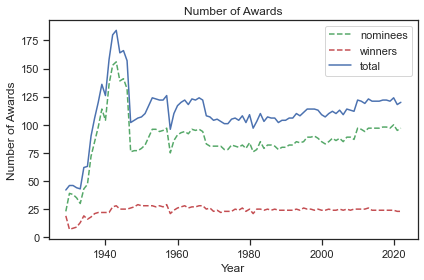

In [256]:
plt.plot(x,y1,'g--',label='nominees')
plt.plot(x,y2,'r--',label='winners')
plt.plot(x,y3,'-',label='total')
plt.title('Number of Awards')
plt.xlabel('Year')
plt.ylabel('Number of Awards')
plt.legend()
plt.tight_layout()

In [300]:
df1 = df_award.groupby(['info1','status'])['award'].aggregate('count').unstack()
df1

status,nominee,winner
info1,,
"$1,000 a Minute",1.0,NaN
'Round Midnight,NaN,1.0
(A) Torzija [(A) Torsion],1.0,NaN
(I'm Gonna) Love Me Again,NaN,1.0
...And Justice for All,1.0,NaN
...,...,...
the accountant,NaN,1.0
the end,1.0,NaN
"tick, tick...BOOM!",1.0,NaN


In [301]:
# top 10 nominees
df1['nominee'].dropna().sort_values(ascending=False).head(10)

info1
Meryl Streep                                         18.0
A Star Is Born                                       15.0
Mutiny on the Bounty                                 11.0
True Grit                                             9.0
Jack Nicholson                                        9.0
Gangs of New York                                     9.0
Joker                                                 9.0
Bette Davis                                           9.0
Master and Commander: The Far Side of the World       8.0
The Lord of the Rings: The Fellowship of the Ring     8.0
Name: nominee, dtype: float64

In [306]:
# top 10 winners
df1['winner'].dropna().sort_values(ascending=False).head(10)

info1
Titanic                                          12.0
The Lord of the Rings: The Return of the King    11.0
The Last Emperor                                  9.0
Gigi                                              9.0
Ben-Hur                                           9.0
The English Patient                               8.0
West Side Story                                   8.0
Slumdog Millionaire                               8.0
Star Wars                                         7.0
Gravity                                           7.0
Name: winner, dtype: float64

In [274]:
# find the top 10 nominees (considering both winner and nominee) 
df_award.groupby('info1')['award'].aggregate('count').sort_values(ascending=False).head(10)

info1
Meryl Streep                                         21
A Star Is Born                                       18
West Side Story                                      15
Titanic                                              14
Cleopatra                                            13
Moulin Rouge                                         12
The Lord of the Rings: The Fellowship of the Ring    12
Mutiny on the Bounty                                 12
Katharine Hepburn                                    12
Mary Poppins                                         12
Name: award, dtype: int64

In [273]:
# get the award information for top 1 actor/actress: Meryl Streep  
df_award[df_award['info1'] == 'Meryl Streep']

,info1,info2,status,award,year
5541,Meryl Streep,The Deer Hunter,nominee,Actress in a Supporting Role,1979
5639,Meryl Streep,Kramer vs. Kramer,winner,Actress in a Supporting Role,1980
5844,Meryl Streep,The French Lieutenant's Woman,nominee,Actress in a Leading Role,1982
5943,Meryl Streep,Sophie's Choice,winner,Actress in a Leading Role,1983
6055,Meryl Streep,Silkwood,nominee,Actress in a Leading Role,1984
6267,Meryl Streep,Out of Africa,nominee,Actress in a Leading Role,1986
6479,Meryl Streep,Ironweed,nominee,Actress in a Leading Role,1988
6580,Meryl Streep,A Cry in the Dark,nominee,Actress in a Leading Role,1989
6788,Meryl Streep,Postcards from the Edge,nominee,Actress in a Leading Role,1991
7329,Meryl Streep,The Bridges of Madison County,nominee,Actress in a Leading Role,1996


In [308]:
# get the award information for top 1 film winner : Titanic  
df_award[df_award['info1'] == 'Titanic']

,info1,info2,status,award,year
2727,Titanic,"Art Direction: Lyle Wheeler, Maurice Ransford;...",nominee,Art Direction (Black-and-White),1954
2821,Titanic,"Charles Brackett, Walter Reisch, Richard Breen",winner,Writing (Story and Screenplay),1954
7564,Titanic,Art Direction: Peter Lamont; Set Decoration: M...,winner,Art Direction,1998
7569,Titanic,Russell Carpenter,winner,Cinematography,1998
7574,Titanic,Deborah L. Scott,winner,Costume Design,1998
7579,Titanic,James Cameron,winner,Directing,1998
7594,Titanic,"Conrad Buff, James Cameron, Richard A. Harris",winner,Film Editing,1998
7606,Titanic,"Tina Earnshaw, Greg Cannom, Simon Thompson",nominee,Makeup,1998
7607,Titanic,James Horner,winner,Music (Original Dramatic Score),1998
7617,Titanic,"My Heart Will Go On in ""Titanic"" Music by Jame...",winner,Music (Original Song),1998


In [340]:
df_award[df_award['info1'] == 'The Lord of the Rings: The Return of the King']

,info1,info2,status,award,year
8232,The Lord of the Rings: The Return of the King,Art Direction: Grant Major; Set Decoration: Da...,winner,Art Direction,2004
8242,The Lord of the Rings: The Return of the King,Ngila Dickson and Richard Taylor,winner,Costume Design,2004
8247,The Lord of the Rings: The Return of the King,Peter Jackson,winner,Directing,2004
8260,The Lord of the Rings: The Return of the King,Jamie Selkirk,winner,Film Editing,2004
8270,The Lord of the Rings: The Return of the King,Richard Taylor and Peter King,winner,Makeup,2004
8273,The Lord of the Rings: The Return of the King,Howard Shore,winner,Music (Original Score),2004
8278,The Lord of the Rings: The Return of the King,"Into The West in ""The Lord of the Rings: The R...",winner,Music (Original Song),2004
8283,The Lord of the Rings: The Return of the King,"Barrie M. Osborne, Peter Jackson and Fran Wals...",winner,Best Picture,2004
8301,The Lord of the Rings: The Return of the King,"Christopher Boyes, Michael Semanick, Michael H...",winner,Sound Mixing,2004
8306,The Lord of the Rings: The Return of the King,"Jim Rygiel, Joe Letteri, Randall William Cook ...",winner,Visual Effects,2004


In [341]:
df_award[df_award['info1'] == 'The Last Emperor']

,info1,info2,status,award,year
6485,The Last Emperor,Art Direction: Ferdinando Scarfiotti; Set Deco...,winner,Art Direction,1988
6490,The Last Emperor,Vittorio Storaro,winner,Cinematography,1988
6495,The Last Emperor,James Acheson,winner,Costume Design,1988
6500,The Last Emperor,Bernardo Bertolucci,winner,Directing,1988
6515,The Last Emperor,Gabriella Cristiani,winner,Film Editing,1988
6528,The Last Emperor,"Ryuichi Sakamoto, David Byrne, Cong Su",winner,Music (Original Score),1988
6538,The Last Emperor,"Jeremy Thomas, Producer",winner,Best Picture,1988
6549,The Last Emperor,"Bill Rowe, Ivan Sharrock",winner,Sound,1988
6557,The Last Emperor,"Mark Peploe, Bernardo Bertolucci",winner,Writing (Screenplay Based on Material from Ano...,1988


### Ceremony

In [324]:
df_ceremony = pd.read_csv('ceromony_information.csv')
df_ceremony.at[54,'Location']='Dorothy Chandler Pavilion'
df_ceremony.at[55,'Location']='Dorothy Chandler Pavilion'
df_ceremony

,Ordinal,Year,Location,Date,Release
0,1st,1929,Blossom Room of the Hollywood Roosevelt Hotel,"Thursday, May 16, 1929","Honoring movies released from August 1, 1927 ..."
1,2nd,1930,Cocoanut Grove of the Ambassador Hotel,"Thursday, April 3, 1930","Honoring movies released from August 1, 1928 ..."
2,3rd,1931,Fiesta Room of the Ambassador Hotel,"Wednesday, November 5, 1930","honoring movies released from August 1, 1929 ..."
3,4th,1932,Sala D'Oro in the Biltmore Hotel,"Tuesday, November 10, 1931","Honoring movies released from August 1, 1930 ..."
4,5th,1933,Fiesta Room of the Ambassador Hotel,"Friday, November 18, 1932","Honoring movies released from August 1, 1931 ..."
...,...,...,...,...,...
89,90th,2018,Dolby Theatre at the Hollywood & Highland Center,"Sunday, March 4, 2018",Honoring movies released in 2017
90,91st,2019,Dolby Theatre at the Hollywood & Highland Center,"Sunday, February 24, 2019",Honoring movies released in 2018
91,92nd,2020,Dolby Theatre at the Hollywood & Highland Center,"Sunday, February 9, 2020",Honoring movies released in 2019
92,93rd,2021,Union Station Los Angeles and the Dolby Theatr...,"Sunday, April 25, 2021",Honoring movies released in 2020


In [329]:
df_ceremony['Location'].value_counts()

Dorothy Chandler Pavilion                                                             25
RKO Pantages Theatre                                                                  11
Kodak Theatre at Hollywood & Highland Center                                          10
Dolby Theatre at the Hollywood & Highland Center                                       8
Santa Monica Civic Auditorium                                                          8
Biltmore Bowl of the Biltmore Hotel                                                    7
Shrine Civic Auditorium                                                                5
Shrine Auditorium & Expo Center                                                        5
Fiesta Room of the Ambassador Hotel                                                    3
Grauman's Chinese Theatre                                                              3
Cocoanut Grove of the Ambassador Hotel                                                 2
Union Station Los Ang

In [331]:
df_ceremony[df_ceremony['Location']=='Dorothy Chandler Pavilion']

,Ordinal,Year,Location,Date,Release
40,41st,1969,Dorothy Chandler Pavilion,"Monday, April 14, 1969",Honoring movies released in 1968
41,42nd,1970,Dorothy Chandler Pavilion,"Tuesday, April 7, 1970",Honoring movies released in 1969
42,43rd,1971,Dorothy Chandler Pavilion,"Thursday, April 15, 1971",Honoring movies released in 1970
43,44th,1972,Dorothy Chandler Pavilion,"Monday, April 10, 1972",Honoring movies released in 1971
44,45th,1973,Dorothy Chandler Pavilion,"Tuesday, March 27, 1973",Honoring movies released in 1972
45,46th,1974,Dorothy Chandler Pavilion,"Tuesday, April 2, 1974",Honoring movies released in 1973
46,47th,1975,Dorothy Chandler Pavilion,"Tuesday, April 8, 1975",Honoring movies released in 1974
47,48th,1976,Dorothy Chandler Pavilion,"Monday, March 29, 1976",Honoring movies released in 1975
48,49th,1977,Dorothy Chandler Pavilion,"Monday, March 28, 1977",Honoring movies released in 1976
49,50th,1978,Dorothy Chandler Pavilion,"Monday, April 3, 1978",Honoring movies released in 1977
